<a href="https://colab.research.google.com/github/niraj8763/Deep-Learning/blob/master/Regression_using_deep_learning_Tensorflow_%26_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import Required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [4]:
data = pd.read_csv('/content/kc_house_data.csv.zip')

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.shape

(21613, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [9]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
import datetime
def get_year(date):
  date = str(date)
  year = date[0:4]
  month= date[4:6]
  day = date[6:8]
  date = year+'-'+month+'-'+day
  date = datetime.datetime.strptime(date, '%Y-%m-%d')    
  return date

In [18]:
data['date'] = data['date'].apply(get_year)

In [19]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
data['is_basement'] = data['sqft_basement'].apply(lambda x: 1 if x != 0 else 0)

In [22]:
#updating living room area and lot area based on the new values of 2015
data = data.drop(['sqft_living','sqft_lot','sqft_basement','sqft_above'],axis=1)

In [23]:
data.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2015-02-18,510000.0,3,2.00,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503,0


In [25]:
def update_yr_built(cols):
  yr_built = cols[0]
  yr_renovated = cols[1]
  if yr_renovated != 0:
    yr_built = yr_renovated
  return yr_built
data['yr_built'] = data[['yr_built','yr_renovated']].apply(update_yr_built,axis=1)    

In [26]:
data.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0,0,3,7,1991,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2015-02-18,510000.0,3,2.00,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503,0


In [28]:
data = data.drop('yr_renovated',axis = 1)

In [29]:
data.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,is_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,0,0,3,7,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0,0,3,7,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,1.0,0,0,3,6,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1.0,0,0,5,7,1965,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2015-02-18,510000.0,3,2.00,1.0,0,0,3,8,1987,98074,47.6168,-122.045,1800,7503,0


In [30]:
data = data.drop(['id','view','lat','long'],axis=1)
data.head()

,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,is_basement
0,2014-10-13,221900.0,3,1.00,1.0,0,3,7,1955,98178,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2.0,0,3,7,1991,98125,1690,7639,1
2,2015-02-25,180000.0,2,1.00,1.0,0,3,6,1933,98028,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1.0,0,5,7,1965,98136,1360,5000,1
4,2015-02-18,510000.0,3,2.00,1.0,0,3,8,1987,98074,1800,7503,0


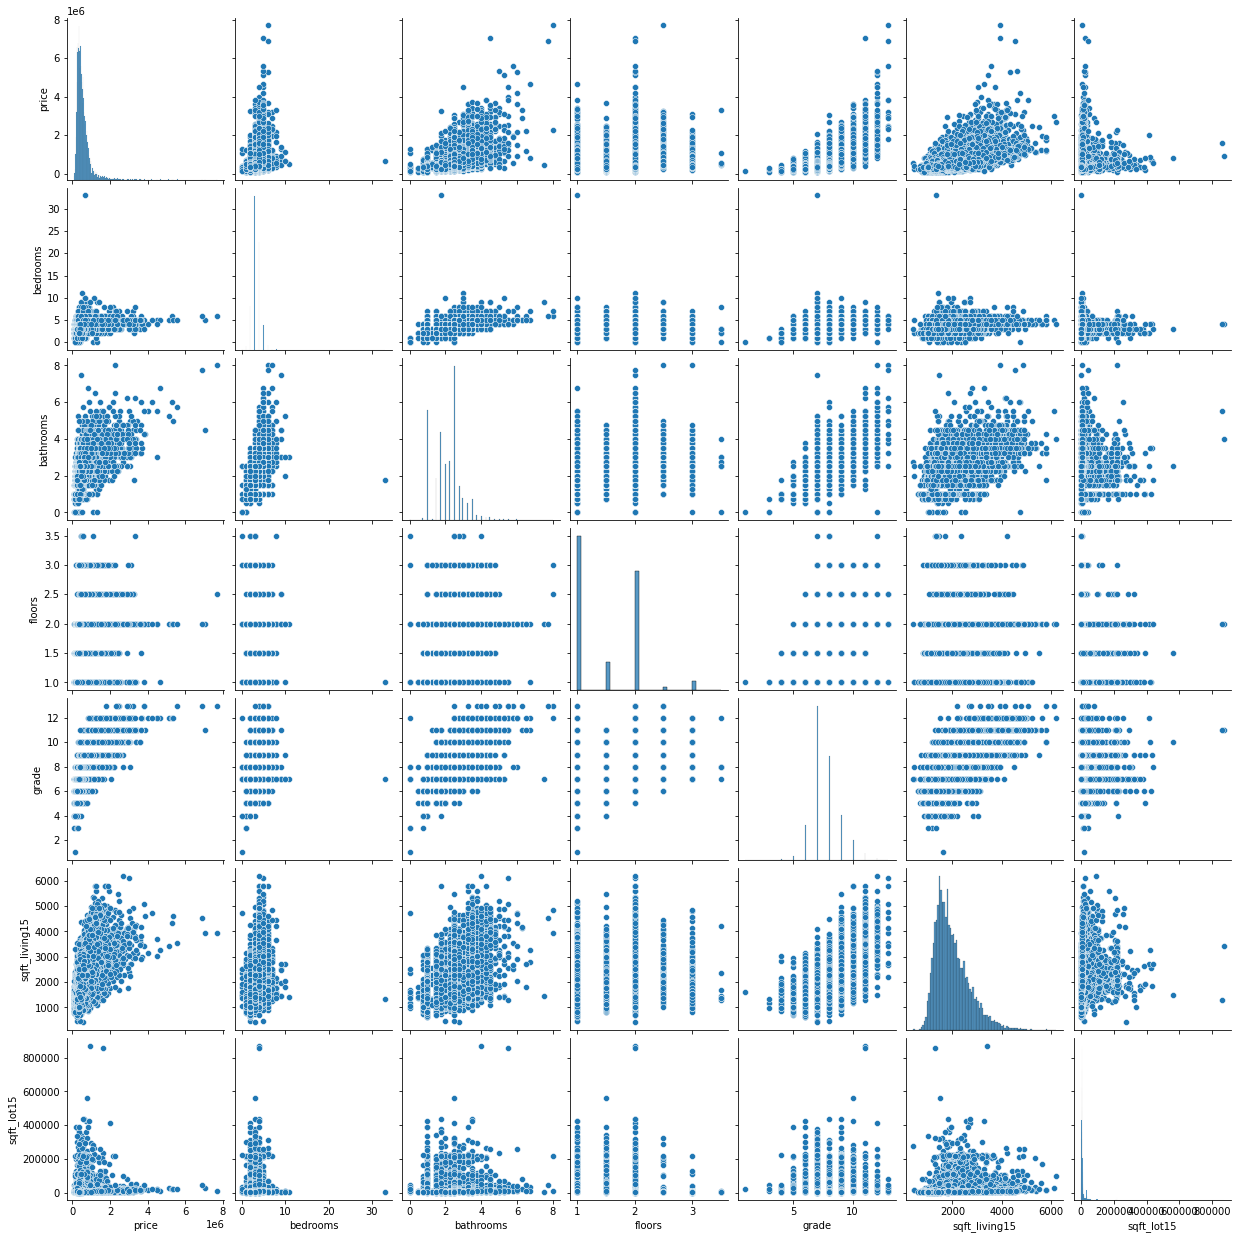

In [31]:
sns.pairplot(data.drop(['date','condition','yr_built','zipcode','waterfront','is_basement'],axis=1))

In [32]:
data.groupby('waterfront').mean()

,price,bedrooms,bathrooms,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,is_basement
waterfront,,,,,,,,,,,
0,5.315636e+05,3.371375,2.110478,1.493193,3.408485,7.648392,1973.387366,98077.798555,1981.386667,12695.378089,0.391096
1,1.661876e+06,3.300613,2.677914,1.641104,3.533742,8.773006,1973.208589,98096.527607,2666.349693,22385.104294,0.601227


In [33]:
#percentage of households having a waterfront
(data['waterfront'].sum()/len(data))*100

0.7541757275713691

In [34]:
data.groupby('is_basement').mean()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
is_basement,,,,,,,,,,,
0,486884.090507,3.248591,2.013485,1.605706,0.004952,3.338488,7.607877,1976.719259,98070.928539,1962.397379,13662.736706
1,622373.563803,3.559915,2.271386,1.322022,0.011547,3.519147,7.732650,1968.230824,98088.783433,2023.910805,11385.359962


In [35]:
# Percentage of households having a basement
(data['is_basement'].sum()/len(data))*100

39.26803312820987

In [36]:
data.head()

,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,is_basement
0,2014-10-13,221900.0,3,1.00,1.0,0,3,7,1955,98178,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2.0,0,3,7,1991,98125,1690,7639,1
2,2015-02-25,180000.0,2,1.00,1.0,0,3,6,1933,98028,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1.0,0,5,7,1965,98136,1360,5000,1
4,2015-02-18,510000.0,3,2.00,1.0,0,3,8,1987,98074,1800,7503,0


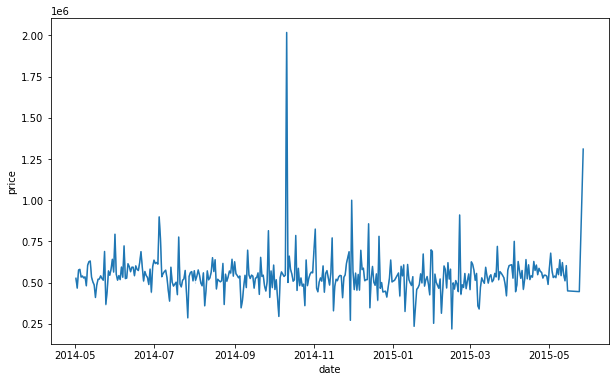

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'date',y = 'price',data = data,ci = False)

In [39]:
data = data.drop('date',axis = 1)

In [41]:
from sklearn.model_selection import train_test_split
X = data.drop('price',axis = 1)
y= data['price']
X_train,X_test,y_train ,y_test = train_test_split(X,y,test_size =0.3)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
norm_X_train = scaler.fit_transform(X_train)

In [44]:
norm_X_test = scaler.fit_transform(X_test)

In [45]:
norm_X_train = pd.DataFrame(data=norm_X_train,columns=X_train.columns)
norm_X_test = pd.DataFrame(data=norm_X_test,columns=X_test.columns)

In [47]:
norm_X_train

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,is_basement
0,-0.409411,-0.155193,0.922053,-0.092736,-0.624808,0.284358,1.017440,-0.928992,-0.567145,-0.131929,-0.800333
1,-0.409411,0.169823,-0.924860,-0.092736,-0.624808,-0.566017,-0.303918,-1.433843,0.364935,0.125719,1.249479
2,-0.409411,-0.155193,-0.924860,-0.092736,-0.624808,0.284358,0.252443,-0.068876,0.204734,-0.113110,1.249479
3,0.701217,-0.805226,-0.924860,-0.092736,0.921270,-0.566017,-1.660049,0.473371,-0.436072,-0.332625,1.249479
4,-0.409411,0.494840,0.922053,-0.092736,0.921270,0.284358,0.356761,-1.340352,0.321244,-0.116867,-0.800333
...,...,...,...,...,...,...,...,...,...,...,...
15124,-1.520039,-1.455259,-0.924860,-0.092736,-0.624808,-0.566017,-0.477781,-0.854200,-1.076877,-0.227120,-0.800333
15125,-0.409411,-1.455259,-0.924860,-0.092736,0.921270,-0.566017,-0.651644,-0.405444,-0.858421,-0.169318,1.249479
15126,-0.409411,-0.480210,-0.924860,-0.092736,0.921270,0.284358,-0.929825,2.268395,0.714465,-0.252885,1.249479
15127,0.701217,0.494840,-0.001404,-0.092736,2.467347,0.284358,-0.895052,0.697749,0.743593,-0.226305,1.249479


In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [49]:
def build_model():
    model = keras.Sequential([layers.Dense(60, activation=tf.nn.relu, input_shape=[len(norm_X_train.keys())]),
            layers.Dropout(0.5),
            layers.Dense(60, activation=tf.nn.relu,kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)),
            layers.Dropout(0.5),
            layers.Dense(60, activation=tf.nn.relu,kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)),layers.Dense(1)])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [50]:
model = build_model()

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                720       
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 8,101
Trainable params: 8,101
Non-trainable params: 0
______________________________________________________

In [52]:
EPOCHS = 1500


In [53]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    
    plt.legend()
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    
    plt.legend()
    plt.show()

In [54]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(norm_X_train, y_train, epochs=EPOCHS,batch_size=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

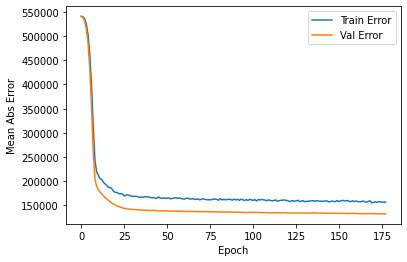

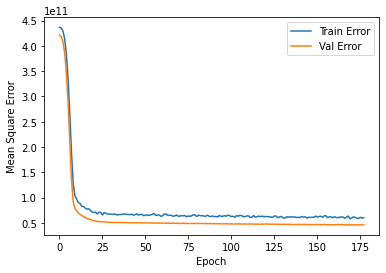

In [55]:
plot_history(history)

In [56]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
173,5.997327e+10,157833.281250,5.997327e+10,4.645180e+10,132784.000000,4.645180e+10,173
174,5.872347e+10,156979.093750,5.872347e+10,4.617289e+10,132700.500000,4.617289e+10,174
175,6.115386e+10,157005.296875,6.115386e+10,4.633958e+10,132716.515625,4.633958e+10,175
176,5.968481e+10,156426.484375,5.968481e+10,4.623746e+10,132489.421875,4.623745e+10,176
177,6.058955e+10,156926.750000,6.058954e+10,4.619398e+10,132404.765625,4.619398e+10,177


In [57]:
loss, mae, mse = model.evaluate(norm_X_train, y_train, verbose=0)

print("Training set Mean Abs Error: {:5.2f}".format(mae))

Training set Mean Abs Error: 132655.22


In [58]:
data['price'].mean()

540088.1417665294

(0.0, 2000000.0)

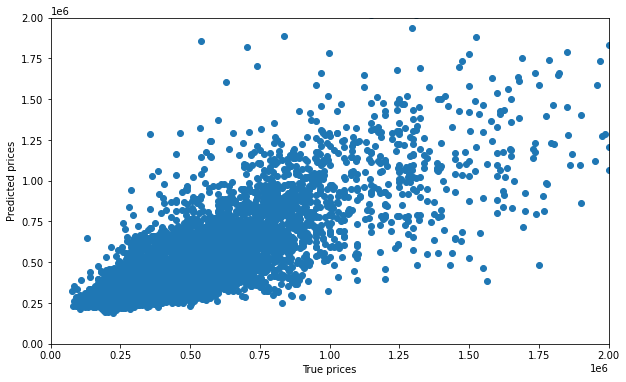

In [59]:
test_predictions = model.predict(norm_X_test).flatten()
plt.figure(figsize=(10,6))
plt.scatter(y_test, test_predictions)
plt.xlabel('True prices')
plt.ylabel('Predicted prices')
plt.xlim(0,2000000)
plt.ylim(0,2000000)

In [60]:
loss, mae, mse = model.evaluate(norm_X_test, y_test, verbose=0)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

Testing set Mean Abs Error: 132100.70


(0.0, 2000000.0)

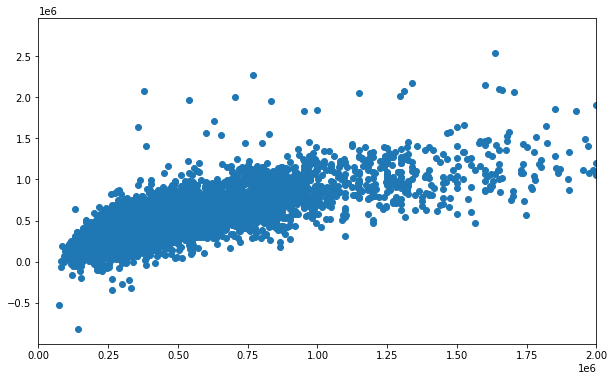

In [61]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(norm_X_train,y_train)
predictions = lm.predict(norm_X_test)
plt.figure(figsize=(10,6))
ax = plt.scatter(y_test,predictions)
plt.xlim(0,2000000)

In [62]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)

147638.92967260611